In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os
import sys
import urllib.request
import tarfile
import zipfile
from random import randrange
from functools import partial
import itertools
import time

# specify the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [5]:
def download_and_extract(url, download_dir):
    """
    Download and extract the CIFAR-10 dataset if it doesn't already exist.

    Parameters
    ----------
    url : str
        Internet URL for the tar-file to download.
        Example: "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    download_dir : str
        Directory where the downloaded file will be saved and extracted.
        Example: "data/CIFAR-10/"

    Returns
    -------
    None
    """

    # Determine filename and full path where the file will be saved
    filename = url.split('/')[-1]
    file_path = os.path.join(download_dir, filename)

    # Check if dataset is already downloaded (and extracted)
    if not os.path.exists(file_path):
       # Create the directory if it doesn’t exist
        if not os.path.exists(download_dir):
            os.makedirs(download_dir)

        # Download the dataset
        print("Downloading, This might take several minutes.")
        last_update_time = time.time()
        file_path, _ = urllib.request.urlretrieve(url=url, filename=file_path)

        print()
        print("Download finished. Extracting files.")

        # Extract the dataset
        if file_path.endswith(".zip"):
            # Unpack the zip-file.
            zipfile.ZipFile(file=file_path, mode="r").extractall(download_dir)
        elif file_path.endswith((".tar.gz", ".tgz")):
            # Unpack the tar-ball.
            tarfile.open(name=file_path, mode="r:gz").extractall(download_dir)

        print("Done. Dataset is ready!")
    else:
        print("Dataset already downloaded and unpacked.")
        print("If something seems wrong, delete the folder and re-run.")


def load_CIFAR_batch(filename):
    ''' Load a single batch of the CIFAR-10 dataset.'''
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding = 'latin1')
        X = datadict['data']
        Y = datadict['labels']

        # Reshape and transpose: original shape (10000, 3072)
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        Y = np.array(Y)
        return X, Y


def load(ROOT):
    ''' Load all training and test batches of CIFAR-10.'''
    xs = []
    ys = []
    for b in range(1, 6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [222]:
URL = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
PATH = 'datasets/cirfar10/'
download_and_extract(URL, PATH)

Dataset already downloaded and unpacked.
If something seems wrong, delete the folder and re-run.


In [235]:
# ---------------------------------------------------------------------
# Load the full CIFAR-10 dataset from local path
# ---------------------------------------------------------------------
CIFAR10_PATH = os.path.join(PATH, 'cifar-10-batches-py')
X_train, y_train, X_test, y_test = load(CIFAR10_PATH)  # load the entire data

## Data Preprocessing

$\text{We'll be training our models on a subset of the classes in this case we'll extract 3 classes}$ <br> 
$\text{So we'll create a boolean array based on the values that we desires using }$ np.isin(data, comparative) <br>
$\text{We'll then apply this mask to extract the relvant examples from x}$ <br>
$\text{We'll then convert these labels to our 0, 1, 2 labels for the sake of simplicity using advance map indexing and }$ np.vectorize(our_map)(data_list) <br>

In [ ]:
TARGET_CLASSES = [3, 4, 5]
training_mask = np.isin(y_train, TARGET_CLASSES)
testing_mask = np.isin(y_test, TARGET_CLASSES)

print(y_test.shape)
print(X_train.shape)

X_train = X_train[training_mask]
y_train = y_train[training_mask]

X_test = X_test[testing_mask]
y_test = y_test[testing_mask]

label_map = {orig: i for i, orig in enumerate(TARGET_CLASSES)}

y_train = np.vectorize(label_map.get)(y_train)
y_test = np.vectorize(label_map.get)(y_test)

print(y_test)



(10000,)
(50000, 32, 32, 3)
[0 0 2 ... 0 0 2]


$\text{We'll now create our training, validating and testing vector}$
$\text{here we use the }$ range(x) $\text{ technique}$ <br> $\text{which in this case enables copying values from one array to another using indexing presented in the range of values from 0 to x}$

In [ ]:
num_training= 10000
num_validation = 1000
num_testing = 1000

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = range(num_validation)
X_val = X_test[mask]
y_val = y_test[mask]

mask = range(num_validation, num_validation + num_testing)
X_test = X_test[mask]
y_test = y_test[mask]

print("X_train.shape: ", X_train.shape, "\ny_train.shape: ", y_train.shape)
print("X_val.shape: ", X_val.shape, "\ny_val.shape: ",y_val.shape)
print("X_test.shape: ", X_test.shape, "\ny_test.shape: ", y_test.shape)

# Notice this something different 

mask = [range(num_training)]

X_copy = X_train.copy()

# Now we apply the same process but obtain something different 

X_copy = X_copy[mask]

# We've just increased a dimension 

print(X_copy.shape)

# To be able to squeeze an axis of a dimension it must be of size 1

X_copy_sqzd = np.squeeze(X_copy, axis=0)
# Now we've just restored but cost us more lines
print(X_copy_sqzd.shape)


X_train.shape:  (10000, 32, 32, 3) 
y_train.shape:  (10000,)
X_val.shape:  (1000, 32, 32, 3) 
y_val.shape:  (1000,)
X_test.shape:  (1000, 32, 32, 3) 
y_test.shape:  (1000,)
(1, 10000, 32, 32, 3)
(10000, 32, 32, 3)


In [96]:
def get_batch(X, y, n=1000):
    rand_items = np.random.randint(0, X.shape[0], size=n)
    images = X[rand_items]
    labels = y[rand_items]
    return images, labels

def make_random_grid(x, y, n=4, convert_to_image=True, random_flag=True):
    "Create a grid of random images (or flattened vectors) from dataset."
    if random_flag:
        rand_items = np.random.randint(0, x.shape[0], size=n)
    else:
        rand_items = np.arange(0, x.shape[0])
    images = x[rand_items]
    labels = y[rand_items]
    if convert_to_image:
        grid = np.hstack(np.array([np.asarray((vec_2_img(i) + mean_image), dtype=np.int64) for i in images]))
    else:
        grid = np.hstack(np.array([np.asarray(i, dtype=np.int64) for i in images]))
    print('\t'.join('%9s' % classes[labels[j]] for j in range(n)))
    return grid

def vec_2_img(x):
    """ Convert a flattened CIFAR-10 image vector back to a (32, 32, 3) RGB image.
    Removes bias term if present."""
    x = np.reshape(x[:-1], (32, 32, 3))
    return x

     Frog	      Dog	     Frog	    Horse


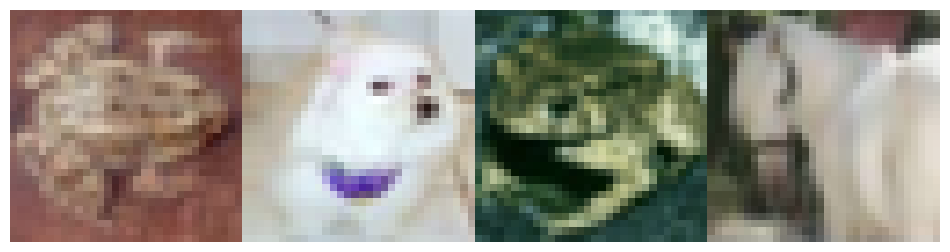

In [97]:
# quick sanity check preview
X_batch, y_batch = get_batch(X_test, y_test, 100)
plt.imshow(make_random_grid(X_batch, y_batch, n=4, convert_to_image=False))
plt.axis("off")
plt.show()

# Loss 

$\text{Multi-Class Classification}$
1. $\text{Choose our probability distribution – } \text{ Categorical distribution}$
2. $\text{We then set our model to predict our parameters } \lambda_i^j \ \forall i \in \{0, 1, 2\} \ \forall j \in \{0, 1, \dots, n\}$
    $\text{We'll choo}

In [ ]:
def softmax_loss(scores, y):
    """
    Computes the loss and gradient for softmax classification

    Inputs: 
    - scores: scores of shape (N, C) where scores[i, c] is the score for class c input X[i]
    y: Vector of lavels

    Returns a tuple of: 
    - loss: Scalar giving the loss 
    - dx: Gradient of the loss with respect to scores
    - REMEMBER TO ALWAYS DIVIDE THE LOSS BY THE BATCH SIZE 
    """
    loss = 0
    dx = None

    N = scores.shape[0]

    # axis = 1 -> in each row
    # Keepdims means if our array was in the form (#, #, ... , #) 
    # then although the new array will be smaller it'l have the same array representation
    max_scores = np.max(scores, axis=1, keepdims=True)


    exp_scores = np.exp(scores - max_scores)

    sum_exp_scores = np.sum(exp_scores, axis=1, keepdims=True)

    # This is a broadcasting operation

    probs = exp_scores / sum_exp_scores

    log_sum_exp = np.log(sum_exp_scores) + max_scores

    Y = np.zeros_like(scores)

    # One hot-code
    # np.arrange(N) = "Create array of size N with values from 0 - N-1"
    # y must be of the same dimensionality to np.arange(N)
    # the Arr[#,#] = w is putting a value in the entry Y[#][#] = w
    # So we going through each row and using the index provided by y to place 1
    Y[np.arange(N), y] = 1

    true_scores = scores[np.arange(N), y]

    loss_per_instance = log_sum_exp.flatten() - true_scores

    loss = np.mean(loss_per_instance)

    dx = probs - Y
    dx /= N

    return loss, dx
    

In [252]:
# some tests
np.random.seed(42)

num_instances = 5
num_classes = 3

y = np.random.randint(num_classes, size=num_instances)
scores = np.random.randn(num_instances * num_classes).reshape(num_instances, num_classes)
loss, dx = softmax_loss(scores, y)


correct_grad = np.array([[ 0.0062,  0.1751, -0.1813],
         [-0.1463,  0.0561,  0.0901],
         [ 0.0404,  0.0771, -0.1174],
         [ 0.0223,  0.0855, -0.1078],
         [-0.1935,  0.1358,  0.0578]])
correct_loss = 1.7544
print(dx)
print(loss)

assert np.isclose(dx.round(4), correct_grad, rtol=1e-3).all()
assert np.isclose(loss.round(4), correct_loss, rtol=1e-3).all()

(5, 1)
(5,)
[[ 0.00620775  0.17508363 -0.18129138]
 [-0.14625024  0.05614496  0.09010528]
 [ 0.04036297  0.07706864 -0.11743161]
 [ 0.02228183  0.08546912 -0.10775095]
 [-0.19352258  0.13575747  0.0577651 ]]
1.7543643062726173


In [ ]:
def l2_regularization_loss(W, reg=0):
    """
    L2 regulariztion loss function, vectorized version.
    - W: a layer's weights.
    - reg: (float) regularization strength
    """
    loss = 0.0
    dW = np.zeros_like(W)

    loss = loss + reg * 0.5 * (W**W)
    dw = dw + reg*W
    return loss, dW

In [ ]:
def fc_forward(X, W, b):
    """
    Computes the forward pass for an fully connected layer.
    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.
    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - W: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    cache = None
    N = X.shape[0]
    X_flat = np.reshape(N, -1)
    out = np.dot(X_flat, W) + b
    out = (X.copy(), W.copy(), b.copy())
    return out, cache

In [ ]:
def fc_forward(X, W, b):
    """
    Computes the forward pass for an fully connected layer.
    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.
    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - W: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    cache = None
    N = X.shape[0]
    X_col = X.reshape(N, -1)

    return out, (X.copy(), W.copy(), y.copy())